# What is Vanishing Gradient

Vanishing gradient problem is a phenomenon that occurs during the training of deep neural networks, where the gradients that are used to update the network become extremely small or "vanish" as they are backpropogated from the output layers to the earlier layers


it happen in following case
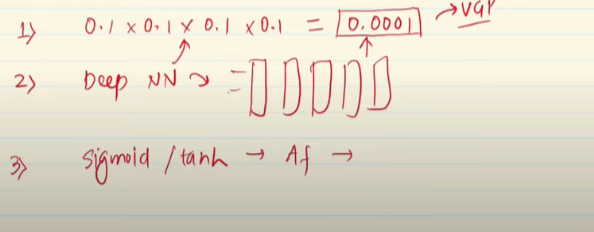





The vanishing gradient problem is particularly associated with the sigmoid and hyperbolic tangent (tanh) activation functions. Let me explain why this occurs:

- Sigmoid Activation Function:<br>
The derivative of the sigmoid function falls within the range of 0 to 0.25.
When gradients are backpropagated through multiple layers, this small derivative leads to exponentially diminishing gradients.
Consequently, the weights in early layers receive very small updates during training, hindering effective learning.
- Hyperbolic Tangent (tanh) Activation Function:<br>
Similar to the sigmoid, the tanh function also has a derivative that falls within the range of 0 to 1.
While it is centered around zero (unlike the sigmoid), it still suffers from the vanishing gradient issue.
As gradients propagate backward, they can vanish or become too small to drive meaningful weight updates.

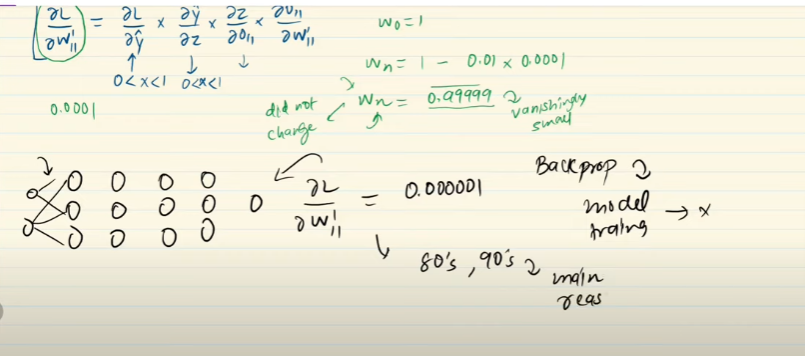

# How to Recognizes the Vanishing Gradient
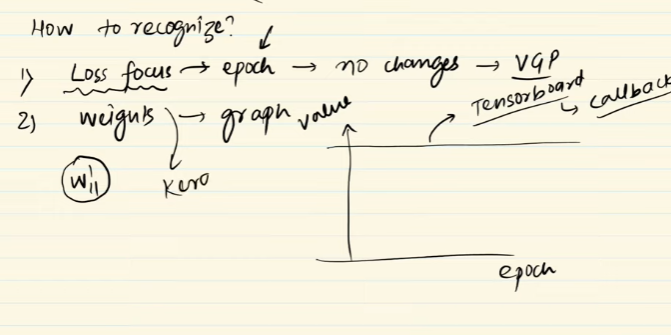

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense
from keras.models import Sequential

from sklearn.datasets import make_moons



In [2]:
X,y =  make_moons(n_samples=250, noise=0.05, random_state=42)

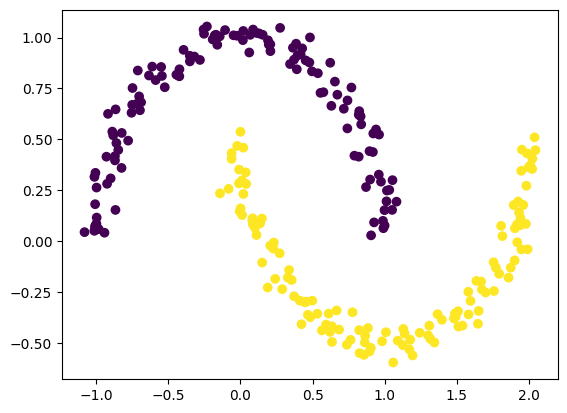

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
model  = Sequential() 
# create deep NN 
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

c:\Users\BW_ML_1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from keras.callbacks import Callback

class WeightsLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        for layer in self.model.layers:
            weights = layer.get_weights()
            print(f"\nWeights for layer {layer.name} at epoch {epoch+1}: {weights}")

# Create your model
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compile your model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Fit your model with the WeightsLogger callback
model.fit(X_train, y_train, epochs=10, callbacks=[WeightsLogger()])


Epoch 1/10


c:\Users\BW_ML_1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.7202
Weights for layer dense_20 at epoch 1: [array([[ 0.31677935,  0.11228423, -0.20816104, -0.27946067, -0.36605984,
        -0.5597559 ,  0.63564587, -0.34171873, -0.6339795 ,  0.05151131],
       [-0.32931918, -0.223381  , -0.25668046, -0.14496987, -0.47671938,
        -0.06842544,  0.26159686, -0.33331305,  0.29327008,  0.5755803 ]],
      dtype=float32), array([ 0.00639652,  0.00656519, -0.00657556, -0.0064894 , -0.00655758,
        0.00629244, -0.00641089,  0.00657281,  0.0063493 , -0.00643851],
      dtype=float32)]

Weights for layer dense_21 at epoch 1: [array([[ 0.31420958,  0.373145  ,  0.40534988, -0.51328397,  0.32834512,
         0.40644938,  0.32578492,  0.30429062, -0.1527997 , -0.04404252],
       [ 0.06878553,  0.04244335, -0.28209025, -0.16864955, -0.10638754,
         0.24012555, -0.35695183,  0.39096755, -0.41878167, -0.35828844],
       [ 0.17820664,  0.40832996, -0.5332921 ,  0.34091535,  0.398533  ,
        -0.074943

In [17]:
model.get_weights()[1]

array([ 0.16365108, -0.27224308, -0.07864153, -0.06674491,  0.00849637,
        0.04155879,  0.08771984, -0.03704438, -0.16986659, -0.1404284 ],
      dtype=float32)

In [24]:
old_weights = model.layers[1].get_weights()[0]

10

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [8]:
model.fit(X_train,y_train,epochs=100)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4843 - loss: 0.7030
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.5073 - loss: 0.6952
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.5038 - loss: 0.6936
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.5240 - loss: 0.6921
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.4905 - loss: 0.6936
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.5384 - loss: 0.6928
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.4865 - loss: 0.6933
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.5317 - loss: 0.6917
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.4919 - loss: 0.6937
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.5086 - loss: 0.6930
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.4988 - loss: 0.6937
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.

In [9]:
new_weights = model.get_weights()[0] 

model.optimizer.get_config()

{'name': 'adam',
 'learning_rate': 0.0010000000474974513,
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'loss_scale_factor': None,
 'gradient_accumulation_steps': None,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [10]:
model.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [11]:
gradient =  (old_weights-new_weights)/0.001
gradient

array([[  550.60736,  -362.34024,   694.03033,  -456.8985 ,   604.5375 ,
          522.31116,   531.3453 ,  -507.26334,  -411.14465,  -162.23454],
       [-1164.7448 ,  1220.0791 , -1176.968  ,  1207.3986 , -1190.5615 ,
        -1196.2441 , -1130.4814 ,  1185.6133 ,  1187.8628 ,  1004.4212 ]],
      dtype=float32)

In [12]:
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [13]:
new_weights

array([[-0.43784583,  1.0033628 , -0.04087783,  0.74417365, -0.31174892,
        -0.60812116, -0.5120417 ,  0.54854214,  0.8314682 ,  0.8263913 ],
       [ 0.87691724, -1.0707163 ,  1.5633626 , -1.7825383 ,  1.4173186 ,
         1.5876402 ,  0.93375903, -1.5457658 , -1.3823814 , -1.6533405 ]],
      dtype=float32)

In [14]:
old_weights

array([[ 0.11276156,  0.6410225 ,  0.6531525 ,  0.28727514,  0.29278857,
        -0.08580995,  0.01930362,  0.04127878,  0.42032355,  0.66415673],
       [-0.28782758,  0.14936286,  0.38639456, -0.5751396 ,  0.22675711,
         0.39139587, -0.19672245, -0.3601524 , -0.1945185 , -0.64891917]],
      dtype=float32)

In [27]:
for i in range(5):
    arr = model.layers[i].get_weights()[0]
    print(len(arr))
    print("_______________")




2
_______________
10
_______________
10
_______________
10
_______________
10
_______________


2
_______________
10
_______________
10
_______________
10
_______________
10
_______________


# How To Overcome Vanishing Gradient 

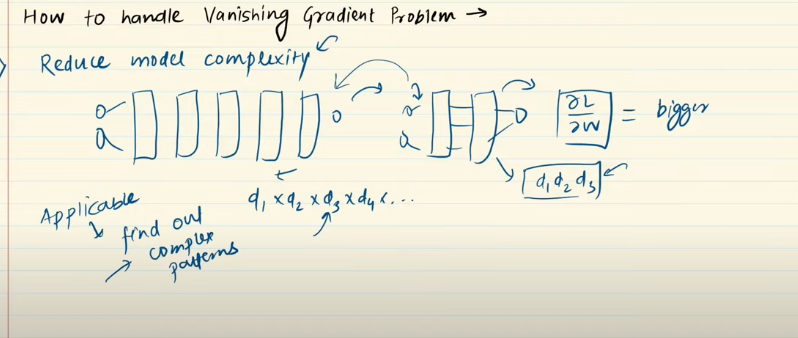
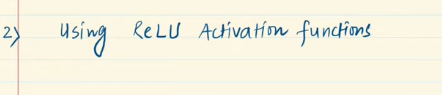
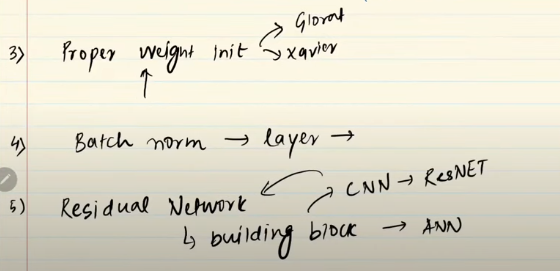

In [10]:


model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\BW_ML_1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5123 - loss: 0.6929
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5159 - loss: 0.6901 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7246 - loss: 0.6872 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7741 - loss: 0.6839 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7880 - loss: 0.6783 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9176 - loss: 0.6706 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8591 - loss: 0.6609 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8855 - loss: 0.6544 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8747 - loss: 0.6311 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9141 - loss: 0.6149 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9228 - loss: 0.5889 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8990 - loss